In [1]:
import sys
configDir =  '/home/thibaud/repos/anaconda/rakuten/notebook'
if configDir not in sys.path:
    sys.path.append(configDir)

import config

print(sys.path)

['/home/thibaud/repos/anaconda/rakuten/notebook', '/home/thibaud/intel/oneapi/intelpython/envs/tensorflow/lib/python39.zip', '/home/thibaud/intel/oneapi/intelpython/envs/tensorflow/lib/python3.9', '/home/thibaud/intel/oneapi/intelpython/envs/tensorflow/lib/python3.9/lib-dynload', '', '/home/thibaud/intel/oneapi/intelpython/envs/tensorflow/lib/python3.9/site-packages', '/home/thibaud/repos/anaconda/rakuten', '/home/thibaud/repos/anaconda/rakuten/src']


2024-03-14 10:56:29.144557: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-14 10:56:29.171711: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-14 10:56:30.366738: I itex/core/wrapper/itex_gpu_wrapper.cc:35] Intel Extension for Tensorflow* GPU backend is loaded.
2024-03-14 10:56:30.395631: I itex/core/wrapper/itex_cpu_wrapper.cc:52] Intel Extension for Tensorflow* AVX2 CPU backend is loaded.
2024-03-14 10:56:30.438895: W itex/core/ops/op_init.cc:58] Op: _QuantizedMaxPool3D is already registere

/home/thibaud/repos/anaconda/rakuten/data/clean


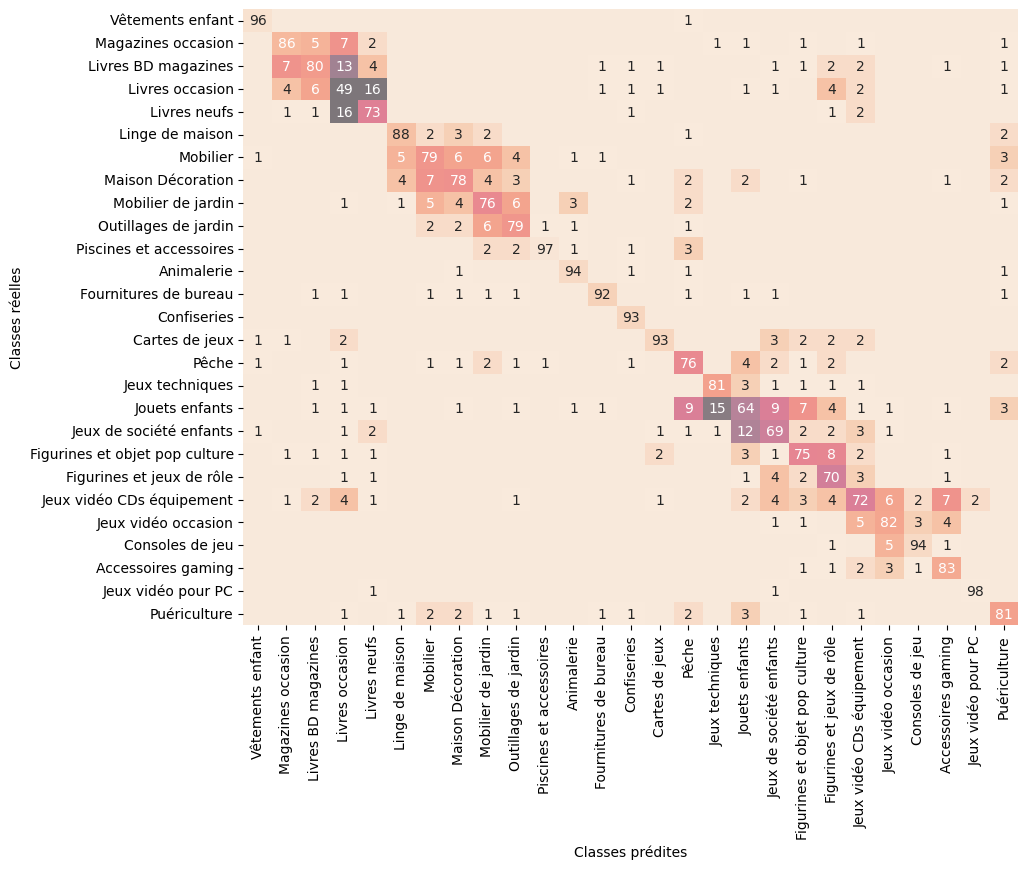

In [2]:

import warnings
warnings.filterwarnings('ignore')
from importlib import reload
import src.utils.results as results

print(config.path_to_data)
reload(results)

from src.utils.results import ResultsManager
res = ResultsManager(config)
res.add_result_file('../results/results_benchmark_sklearn.csv', 'text')
res.add_result_file('../results/results_benchmark_bert.csv', 'bert')
res.add_result_file('../results/results_benchmark_img.csv', 'img')

# res.plot_f1_scores(filter_package=['bert','text'])
# res.plot_f1_scores_by_prdtype(filter_package=['bert','text'])
res.plot_classification_report('text/SVC_skipgram')
# res.plot_classification_report('text/camembert-base-ccnet')
# res.df_results[res.df_results.package=='img'].head()
# text/camembert-base-ccnet
# image/vit_b16
# text/LinearSVC_tfidf

# print(res.get_model_paths())
# res.plot_classification_report_merged(['text/SVC_skipgram','text/LinearSVC_tfidf', 'text/camembert-base-ccnet', 'image/vit_b16','text/flaubert_base_uncased', 'image/ResNet152'])

In [51]:
import os
classes = np.load(os.path.join(
                config.path_to_data, 'le_classes_new.npy'), allow_pickle=True)
# classes_r = []
# for cl in classes:
#     classes_r.append(cl.split(' - ')[1])

# np.save(os.path.join(
#                 config.path_to_data, 'le_classes_new.npy'), classes_r)
print(classes)
# print(np.array(classes_r))


['Livres occasion' 'Figurines et objet pop culture' 'Cartes de jeux'
 'Figurines et jeux de rôle' 'Jouets enfants' 'Jeux de société enfants'
 'Jeux techniques' 'Vêtements enfant' 'Pêche' 'Puériculture' 'Mobilier'
 'Linge de maison' 'Confiseries' 'Maison Décoration' 'Animalerie'
 'Magazines occasion' 'Livres BD magazines' 'Jeux vidéo occasion'
 'Fournitures de bureau' 'Mobilier de jardin' 'Piscines et accessoires'
 'Outillages de jardin' 'Livres neufs' 'Jeux vidéo pour PC'
 'Jeux vidéo CDs équipement' 'Accessoires gaming' 'Consoles de jeu']


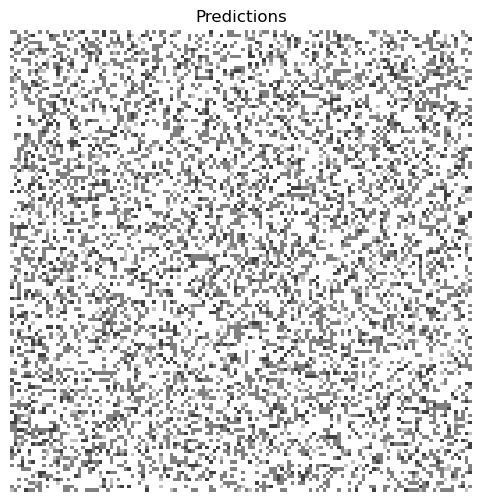

In [41]:
model1 = "text/camembert-base-ccnet"
model2 = "image/vit_b16"
model3 = "text/SVC_skipgram"


def plot_square_pred(res, models =[]):

    y_pred = []
    y_test = res.get_y_test("text/camembert-base-ccnet")
    y_test = y_test[:16900]


    for model in models:
        pred = np.array(res.get_y_pred(model))
        pred = pred[:16900]
        pred = pred == y_test
        pred = pred.reshape(130,130)

        y_pred.append(pred)


    import matplotlib.pyplot as plt
    plt.figure(figsize=(6,6))
    for pred in y_pred:
        plt.imshow(pred, cmap='gray', interpolation='nearest', alpha=0.5)
    plt.title('Predictions')
    plt.axis('off')  # Turn off axis
    plt.show()

    return
plot_square_pred(res, [model1, model2])

# y_pred1 = res.get_y_pred(model1)
# y_pred2 = res.get_y_pred(model2)
# y_pred3 = res.get_y_pred(model3)
# y_test = res.get_y_test(model1)

# import numpy as np
# y_pred1 = np.array(y_pred1[:16900])
# y_pred2 = np.array(y_pred2[:16900])
# y_test = np.array(y_test[:16900])

# print(type(y_pred1))
# y_compare1 = y_pred1 != y_test
# y_compare2 = y_pred2 != y_test

# # print(y_compare)
# img_1 = y_compare1.reshape(130,130)
# img_2 = y_compare2.reshape(130,130)
# img_3 = 
# composite = np.logical_and(img_1, img_2)



# import matplotlib.pyplot as plt
# plt.figure(figsize=(6,6))
# plt.imshow(img_1, cmap='gray', interpolation='nearest', alpha=0.5)
# plt.imshow(img_2, cmap='gray', interpolation='nearest', alpha=0.5)
# plt.imshow(composite, cmap='gray', interpolation='nearest', alpha=0.5)

# plt.title('Boolean Image')
# plt.axis('off')  # Turn off axis
# plt.show()

In [13]:
from importlib import reload
import plotly.graph_objs as go
import numpy as np
import src.utils.plot as uplot

reload(uplot)
scores = fusion[['model_path', 'score_test', 'package', 'classifier', 'vectorization']]

# display(scores)


scores.loc[:, 'vectorizer'] = scores.apply(lambda row: row.classifier if pd.isna(row.vectorization) else row.vectorization, axis=1)
scores=scores.groupby(['model_path', 'package', 'classifier', 'vectorizer']).max('score_test').reset_index()
scores = scores[scores.package != 'img']
sorted_scores = scores.sort_values(by='score_test', ascending=False)

# Sort 'scores' by 'score_test' in descending order
sorted_scores = scores.sort_values('score_test', ascending=False)

# Create custom categories order based on the sorted 'score_test'
custom_categories_order = sorted_scores['model_path'].tolist()


uplot.plot_bench_results(
    sorted_scores, 
    'model_path', 
    'score_test', 
    'model', 
    'f1 score', 
    color_column='vectorizer',
    title='Benchmark des f1 scores'
)




/tmp/ipykernel_1141312/2952430557.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<module 'matplotlib.pyplot' from '/home/thibaud/intel/oneapi/intelpython/envs/tensorflow/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [ ]:
from importlib import reload
import plotly.graph_objs as go
import numpy as np
import src.utils.plot as uplot

reload(uplot)
scores = fusion[['model_path', 'score_test', 'package', 'classifier', 'vectorization']]

# display(scores)


scores.loc[:, 'vectorizer'] = scores.apply(lambda row: row.classifier if pd.isna(row.vectorization) else row.vectorization, axis=1)
scores=scores.groupby(['model_path', 'package', 'classifier', 'vectorizer']).max('score_test').reset_index()
scores = scores[scores.package != 'img']
sorted_scores = scores.sort_values(by='score_test', ascending=False)

# Sort 'scores' by 'score_test' in descending order
sorted_scores = scores.sort_values('score_test', ascending=False)

# Create custom categories order based on the sorted 'score_test'
custom_categories_order = sorted_scores['model_path'].tolist()


uplot.plot_bench_results(
    sorted_scores, 
    'model_path', 
    'score_test', 
    'model', 
    'f1 score', 
    color_column='vectorizer',
    title='Benchmark des f1 scores'
)


